In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

# Last week homework

In [2]:
x = np.random.normal(10, 0.4, size = 1000000)
y = np.random.normal(6, 0.3, size = 1000000)


Mean of z: 16.0 Std. Dev of z: 0.5


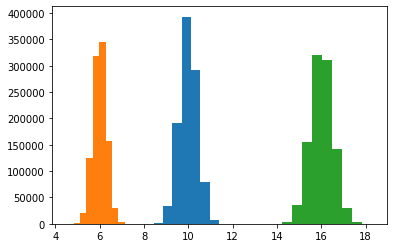

In [3]:
z = x+y
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(y)
plt.hist(z)
plt.show()

Mean of z: 4.0 Std. Dev of z: 0.5


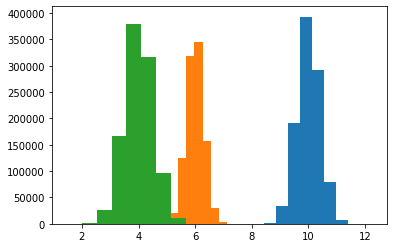

In [4]:
z = x-y
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(y)
plt.hist(z)
plt.show()

Mean of z: 60.0 Std. Dev of z: 3.8


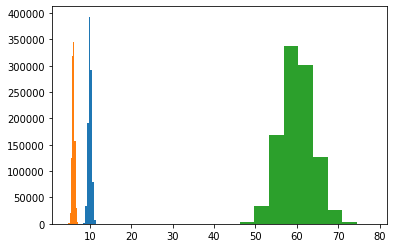

In [5]:
z = x*y
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(y)
plt.hist(z)
plt.show()

# Theoretical formulas for uncertainty propagation

Let $x$ and $y$ be measurements that are independent (not correlating with one another), with uncertainty $\sigma_x$ and $\sigma_y$.

Let $\sigma_{f(x,y)}$ be the uncertainty of the result of a calculation that involves $x$ and $y$, then:

$\sigma_{x+c}^2 = \sigma_x^2$, where $c$ is a constant

$\sigma_{cx}^2 = c^2 \sigma_x^2$, where $c$ is a constant

$\sigma_{x+y}^2 = \sigma_x^2 + \sigma_y^2$

$\sigma_{x-y}^2 = \sigma_x^2 + \sigma_y^2$

$(\frac{\sigma_{xy}}{xy})^2 = (\frac{\sigma_{x}}{x})^2 + (\frac{\sigma_{y}}{y})^2$

$(\frac{\sigma_{x/y}}{x/y})^2 = (\frac{\sigma_{x}}{x})^2 + (\frac{\sigma_{y}}{y})^2$

In general, if we have many independent measurements $x_1$, $x_2$, $x_3$ ... and we calculate a result = $f(x_1, x_2, x_3, ...)$ then $\sigma_{f(..)}$ is related to $\sigma_{x_1}$, $\sigma_{x_2}$, $\sigma_{x_3}$, ... by this equation:

$\sigma_f^2 = (\frac{\partial{f}}{\partial{x_1}}\sigma_{x_1})^2 + (\frac{\partial{f}}{\partial{x_2}}\sigma_{x_2})^2 + (\frac{\partial{f}}{\partial{x_3}}\sigma_{x_3})^2 + ...$

Don't forget that you need the uncertainty itself, not its square, so you should compute this in the end:

$\sigma_f = \sqrt{(\frac{\partial{f}}{\partial{x_1}}\sigma_{x_1})^2 + (\frac{\partial{f}}{\partial{x_2}}\sigma_{x_2})^2 + (\frac{\partial{f}}{\partial{x_3}}\sigma_{x_3})^2 + ...}$

In [6]:
"""
Compare standard deviation of x*y with theory above:
Theory = 3.8
Sampling = 3.8
"""
math.sqrt(((0.4/10)**2 + (0.3/6)**2)*(10*6)**2)

3.841874542459709

Mean of z: 1.7 Std. Dev of z: 0.1


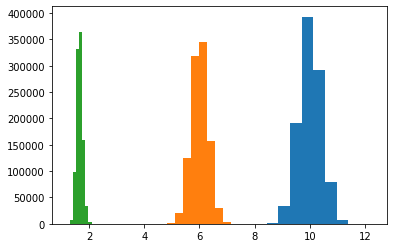

In [7]:
z = x/y
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(y)
plt.hist(z)
plt.show()

In [8]:
"""
Compare standard deviation of x/y with theory above:
Theory = 0.1
Sampling = 0.1
"""
math.sqrt(((0.4/10)**2 + (0.3/6)**2)*(10/6)**2)

0.10671873729054748

Mean of z: 100.0 Std. Dev of z: 4.0


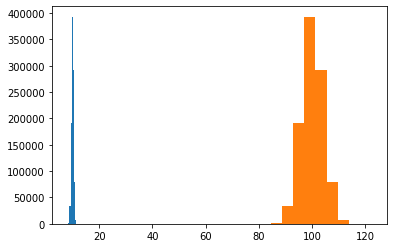

In [9]:
z = 10*x
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(z)
plt.show()

Mean of z: 13.0 Std. Dev of z: 0.4


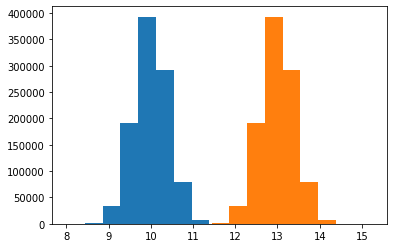

In [10]:
z = x+3
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(z)
plt.show()

Let try looking at a more complicate function of $x$ and $y$ where it's harder to compute uncertainty.  

Let $z = exp(\frac{x^2+y^2}{100})$

Then $\sigma_z^2 = (\frac{\partial{z}}{\partial{x}}\sigma_{x})^2 + (\frac{\partial{z}}{\partial{y}}\sigma_{y})^2 = (\frac{x z}{50}\sigma_{x})^2 + (\frac{y z}{50}\sigma_{y})^2$

For $x$ = 10, $\sigma_x$ = 0.4, $y$ = 6, $\sigma_y$ = 0.3, we calculate $z$ and $\sigma_z$ to be $z$ = 3.89619 and $\sigma_z$ = 0.341801

The calculation below just samples $x$, $y$ and compute $z$ and calculates the standard deviation of sampled $z$.  The result is in a good agreement with theoretical values:



Mean of z: 3.9 Std. Dev of z: 0.3


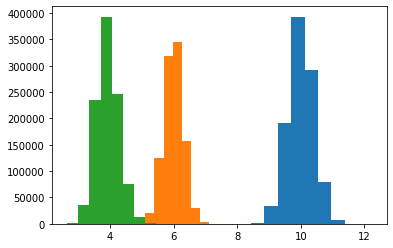

In [11]:
z = np.exp((x**2 + y**2)/100) #More complicate function in x and y
print("Mean of z: {:.1f} Std. Dev of z: {:.1f}".format(np.mean(z),np.std(z)))
plt.hist(x)
plt.hist(y)
plt.hist(z)
plt.show()

In [12]:
np.exp((10**2+6**2)/100) #check the theoretical value of exp((x^2+y^2)/100)

3.896193301795215

# Try to estimate the room's volume

We made a simplifying assumption that the room is rectangular box, so its volume only depends on width, height, and length.

volume = 210 ± 20 m^3


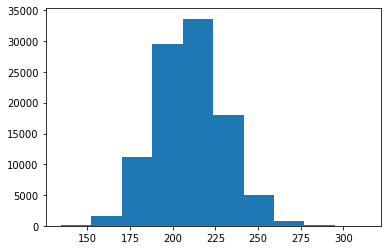

In [13]:
"""
Estimate room's volume
width = 10 m uncertainty 0.5 m
height = 3 m uncertainty 0.1 m
lenght = 7 m uncertainty 0.5 m"""
width = np.random.normal(10, 0.5, 100000)
height = np.random.normal(3, 0.1, 100000)
length = np.random.normal(7, 0.5, 100000)
volume = width * length * height
print("volume = {:.0f} ± {:.0f} m^3".format(np.mean(volume), np.std(volume)))
plt.hist(volume)
plt.show()


## Estimating g from a falling object

We drop a compact object from the height of 2.12 meters and time how long it took for the object to hit the ground. The relationship between the height h and the time t is: $$h = \frac{g t^2}{2}$$ or $$g = \frac{2 h}{t^2}$$

This is a hard experiment to do manually because the falling time is short and there's a large uncertainty in time measurements as can be seen below.

In [14]:
h = np.random.normal(2.1, 0.02, 1000000) #Sample the height h = 2.10 ± 0.02 meters

In [15]:
t_measurements = [ 0.39, 0.59, 0.61, 0.53, 0.56, 0.29, 0.72] #measured time in seconds.
print("avg. of t = {:.2f} sec\nstd.dev = {:.2f} sec".format(np.mean(t_measurements), np.std(t_measurements, ddof=1)))

avg. of t = 0.53 sec
std.dev = 0.14 sec


In [16]:
#Sample t = average(measured t) ± sample_std_dev(measured t)
t = np.random.normal(np.mean(t_measurements), np.std(t_measurements, ddof=1), 1000000)
#t = np.random.normal(np.mean(t_measurements), 0.1, 1000000)

In [17]:
#Calculate g from sampled h and t.  Note the large uncertainty in g
g = 2 * h /t**2
print("Mean of g: {:.2f} m/s^2, Std. Dev of g: {:.2f} m/s^2".format(np.mean(g),np.std(g)))

Mean of g: 139.76 m/s^2, Std. Dev of g: 41921.24 m/s^2


The large values of mean and standard deviation come from some near zero values of sample t, giving extremely large values of g.  We should look at the histogram and see if it's better to use median to represent our estimated g or not.

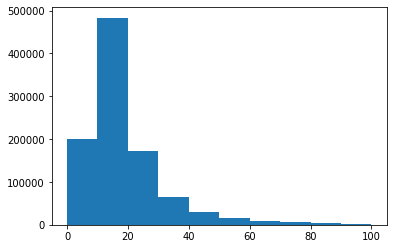

In [18]:
#histogram of g calculated from sampled h and t
plt.hist(g, range=(0,100))
plt.show()

When we look at the histogram, the histogram has a long positive tail (dues to divisions by numbers near zero.  To estimate g, it's better to look at the median value of the sampled g:

In [19]:
print("Median of g: {:.2f} m/s^2".format(np.median(g)))

Median of g: 15.09 m/s^2


To estimate uncertainty around the median, we look at percentiles around the median that contain 68.2% of all the sampled data using np.percentile:

In [20]:
print( np.percentile(g,(50-34.1, 50+34.1)))

[ 9.3229352  28.50581314]


# We took  a video of the falling object and use Tracker program to measure the time to hit the ground.  Time measurement is greatly improved

[Tracker can be found here.](https://physlets.org/tracker/)  You might find it useful when you need to analyze videos in the future.

In [21]:
"""Measure t from video in tracker"""
t_measurements = [(261-223)/60, (262-223)/60, (261-222)/60] #Video frame rate is 60 frames/sec.
print("avg. of t = {:.2f} seconds, std.dev = {:.2f} seconds".format(np.mean(t_measurements), np.std(t_measurements, ddof=1)))

avg. of t = 0.64 seconds, std.dev = 0.01 seconds


In [22]:
#Sample t = average(measured t) ± sample_std_dev(measured t)
t = np.random.normal(np.mean(t_measurements), np.std(t_measurements, ddof=1), 1000000)

Sampled t = 0.64 ± 0.01 seconds


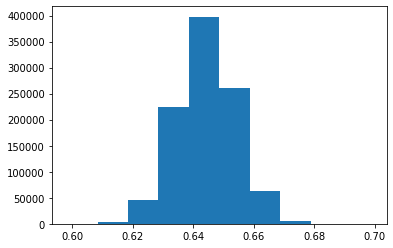

In [23]:
print("Sampled t = {:.2f} ± {:.2f} seconds".format(np.mean(t), np.std(t)))
plt.hist(t)
plt.show()

Mean of g: 10.12, Std. Dev of g: 0.32


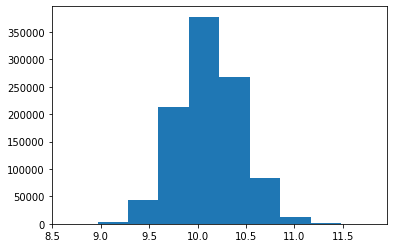

In [24]:
#Calculate g from sampled h and t.  Note the large uncertainty in g
g = 2 * h /t**2
print("Mean of g: {:.2f}, Std. Dev of g: {:.2f}".format(np.mean(g),np.std(g)))
plt.hist(g)
plt.show()

# Measure pendulum period to calculate g

Simple pendulum of lenght L has the period $T = 2 \pi \sqrt{\frac{L}{g}}$,
so we can solve for $g$ if we measure $L$ and $T$:

$$g = \frac{(2 \pi)^2 L}{T^2}$$

In [25]:
periods = [20.74/10, 20/10, 20.5/10] #Three measurements of 10 oscillations yield 20.74, 20, 20.5 seconds.
print("avg. of t = {:.2f} seconds, std.dev = {:.2f} seconds".format(np.mean(periods), np.std(periods, ddof=1)))

avg. of t = 2.04 seconds, std.dev = 0.04 seconds


g = 9.84 ± 0.41 m/s^2


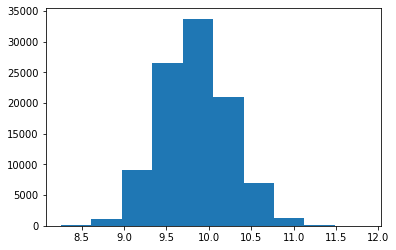

In [26]:
"""L = 1 meter, 10T = 20.04 ± 0.4 sec
we estimate uncertainty of L to be 1 cm = 0.01 m 
and uncertainty of 10T to be 0.4 s, so
uncertainty of T is 0.4/10 s"""
L = np.random.normal(1.0, 0.01, 100000)
T = np.random.normal(20.04/10, 0.4/10, 100000)
g = (2 * math.pi)**2 * L/ T**2
print("g = {:.2f} ± {:.2f} m/s^2".format(np.mean(g), np.std(g)))
plt.hist(g)
plt.show()

# (This is an experiment in a previous year) Curve fitting between rope friction as a function of turns around a pole

In [27]:
turns = np.array([1,2,3,4,5,6]) #number of rope turns around a pipe
tension = np.array([0.6, 0.9, 1.23, 2.5, 5.01, 12.3]) #tension (kg) = friction around the pole
sd_tension = np.array([0.3, 0.3, 0.3, 0.3, 0.3, 0.3]) #uncertainty in tension (kg)

def f(x, a, b):
    return a * np.exp(b * x)  #function to fit, the friction grows exponentially with the number of turns.

We use [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to find parameters of the function to fit to data, along with the parameter's uncertainty.

In [28]:
import scipy.optimize
popt, pcov = scipy.optimize.curve_fit(f, turns, tension, sigma=sd_tension) 

In [29]:
#popt contains the estimated parameters a, b  in the function f(x, a, b) above
popt

array([0.09398923, 0.81068251])

In [30]:
#pcov is the covariance matrix of the parameters a, b.  Its diagonal elements are the estimated variances of a and b.
pcov

array([[ 0.0007118 , -0.00130415],
       [-0.00130415,  0.00241146]])

In [31]:
#to get standard deviation of a and b, use this:
np.sqrt(np.diag(pcov))

array([0.02667954, 0.04910658])

From the popt and pcov above, the estimate parameters a, b are:

    a = 0.094 ± 0.027 kg

    b = 0.811 ± 0.049 

and the friction T vs. number of turns n is:

    T = 0.094 exp( 0.811 n)

We can plot the fitted function and our data with [error bars](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) (uncertainty for each data point) like this:


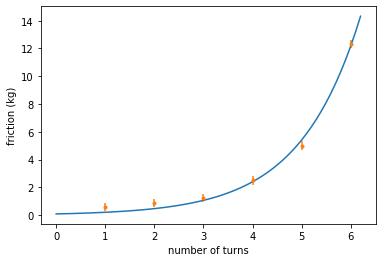

In [32]:
x = np.arange(0,6.3,0.1)
plt.plot(x, f(x, *popt))
plt.errorbar(turns, tension, yerr=sd_tension, fmt = '.')
plt.xlabel("number of turns")
plt.ylabel("friction (kg)")
plt.show()

Every time we increase the number of turns by 1, the friction grows by a factor of exp(0.811) = 2.25 times.